In [71]:
import pandas as pd

input_data = '../model_collocated_10d_filled/'

import pickle 
import pandas as pd

model = pickle.load(open("model_random_forest.pkl", 'rb')) 
model2 = pickle.load(open("model_random_forest_sss_sst_only.pkl", "rb"))

date = '20221029'

profiles = pd.read_feather(f'{input_data}/{date}.feather')

profiles.dropna(inplace=True)
profiles = profiles[profiles['LATITUDE'] >= -60]
profiles = profiles[profiles['LATITUDE'] <= 60]
#predictors_df = profiles.loc[:, ['LATITUDE', 'SSS', 'SST', 'SSH', 'UO', 'VO', 'MLD']]
#predictors_df = profiles.loc[:, ['SSS', 'SST']]
profiles

p1 = profiles.copy()
p2 = profiles.copy()

predictors_df = profiles.loc[:, ['LATITUDE', 'SSS', 'SST', 'SSH', 'UO', 'VO', 'MLD']]
p = model.predict(predictors_df)
p1.iloc[:, -92:] = p

predictors_df = profiles.loc[:, ['SSS', 'SST']]
p = model2.predict(predictors_df)
p2.iloc[:, -92:] = p

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


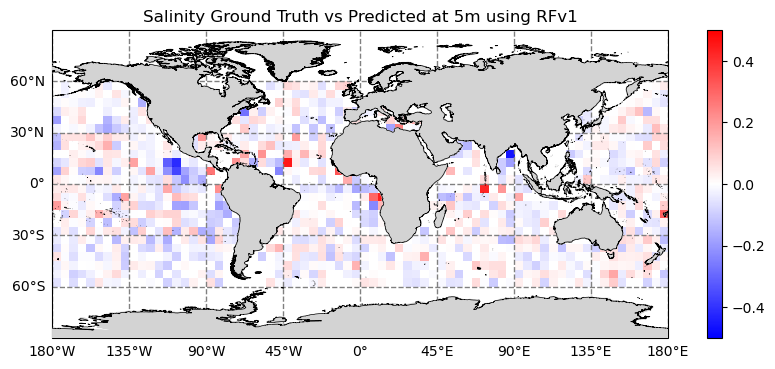

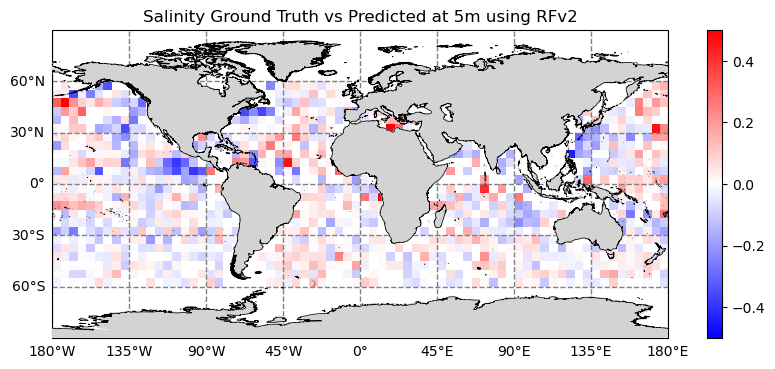

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.stats import binned_statistic_2d
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

bin_means_p1, xedges, yedges, _ = binned_statistic_2d(p1['LONGITUDE'], p1['LATITUDE'], profiles['ASAL_height5.140361309051514'] - p1['ASAL_height5.140361309051514'], statistic='mean', bins=[np.arange(-180, 181, 5), np.arange(-90, 91, 5)])
bin_means_p2, xedges, yedges, _ = binned_statistic_2d(p2['LONGITUDE'], p2['LATITUDE'], profiles['ASAL_height5.140361309051514'] - p2['ASAL_height5.140361309051514'], statistic='mean', bins=[np.arange(-180, 181, 5), np.arange(-90, 91, 5)])

# Step 2: Plot the data using hist2d
plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m', color='black', linewidth=0.5, zorder=4)
ax.add_feature(cfeature.LAND, color='lightgray', edgecolor='black', zorder=3)
plt.imshow(bin_means_p2.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='bwr', vmin=-0.5, vmax=0.5)
plt.title('Salinity Ground Truth vs Predicted at 5m using RFv1')
plt.colorbar()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', linewidth=1, color='gray')
gl.xlocator = plt.FixedLocator(np.arange(-180, 181, 45))
gl.ylocator = plt.FixedLocator(np.arange(-90, 91, 30))
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
plt.savefig('../models_validation/profs_rfv1_asal_5m.png')
plt.show()

plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m', color='black', linewidth=0.5, zorder=4)
ax.add_feature(cfeature.LAND, color='lightgray', edgecolor='black', zorder=3)
plt.imshow(bin_means_p1.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='bwr', vmin=-0.5, vmax=0.5)
plt.title('Salinity Ground Truth vs Predicted at 5m using RFv2')
plt.colorbar()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', linewidth=1, color='gray')
gl.xlocator = plt.FixedLocator(np.arange(-180, 181, 45))
gl.ylocator = plt.FixedLocator(np.arange(-90, 91, 30))
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
plt.savefig('../models_validation/profs_rfv2_asal_5m.png')
plt.show()


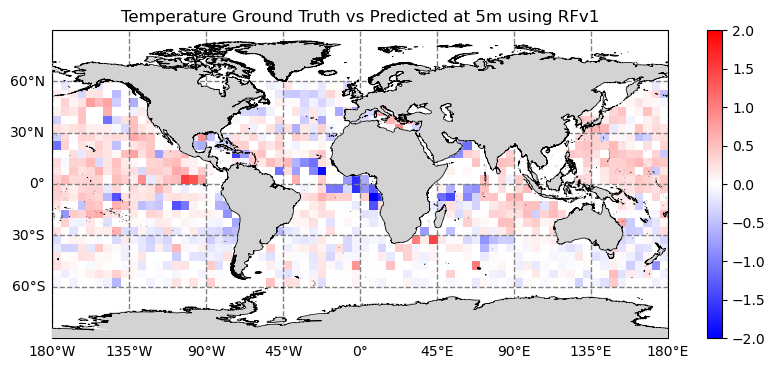

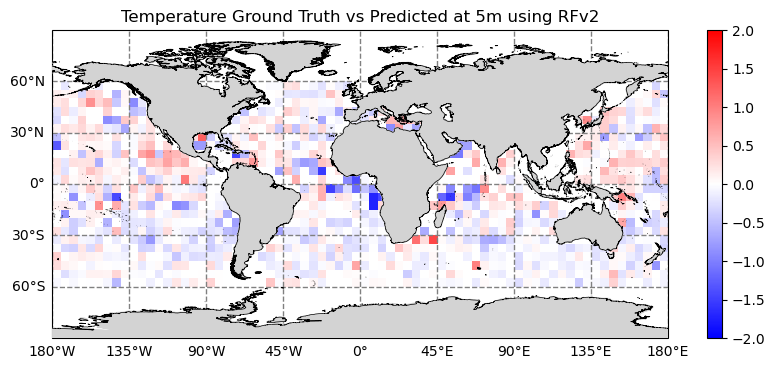

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.stats import binned_statistic_2d
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

bin_means_p1, xedges, yedges, _ = binned_statistic_2d(p1['LONGITUDE'], p1['LATITUDE'], profiles['CTEMP_height5.140361309051514'] - p1['CTEMP_height5.140361309051514'], statistic='mean', bins=[np.arange(-180, 181, 5), np.arange(-90, 91, 5)])
bin_means_p2, xedges, yedges, _ = binned_statistic_2d(p2['LONGITUDE'], p2['LATITUDE'], profiles['CTEMP_height5.140361309051514'] - p2['CTEMP_height5.140361309051514'], statistic='mean', bins=[np.arange(-180, 181, 5), np.arange(-90, 91, 5)])

plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m', color='black', linewidth=0.5, zorder=4)
ax.add_feature(cfeature.LAND, color='lightgray', edgecolor='black', zorder=3)
plt.imshow(bin_means_p2.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='bwr', vmin=-2, vmax=2)
plt.colorbar()
plt.title('Temperature Ground Truth vs Predicted at 5m using RFv1')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', linewidth=1, color='gray')
gl.xlocator = plt.FixedLocator(np.arange(-180, 181, 45))
gl.ylocator = plt.FixedLocator(np.arange(-90, 91, 30))
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
plt.savefig('../models_validation/profs_rfv1_ctemp_5m.png')
plt.show()

plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m', color='black', linewidth=0.5, zorder=4)
ax.add_feature(cfeature.LAND, color='lightgray', edgecolor='black', zorder=3)
plt.imshow(bin_means_p1.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='bwr', vmin=-2, vmax=2)
plt.colorbar()
plt.title('Temperature Ground Truth vs Predicted at 5m using RFv2')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', linewidth=1, color='gray')
gl.xlocator = plt.FixedLocator(np.arange(-180, 181, 45))
gl.ylocator = plt.FixedLocator(np.arange(-90, 91, 30))
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
plt.savefig('../models_validation/profs_rfv2_ctemp_5m.png')
plt.show()

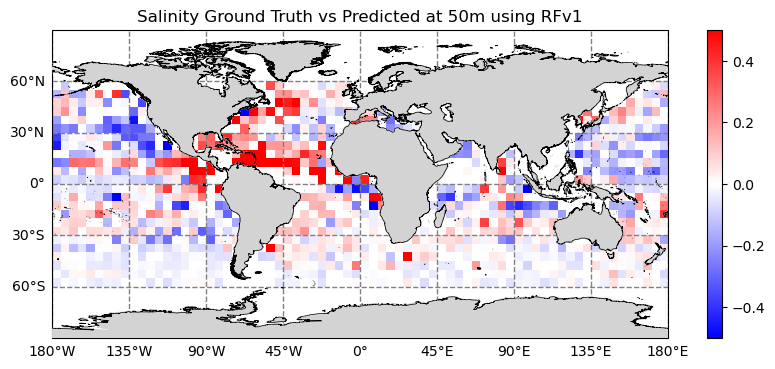

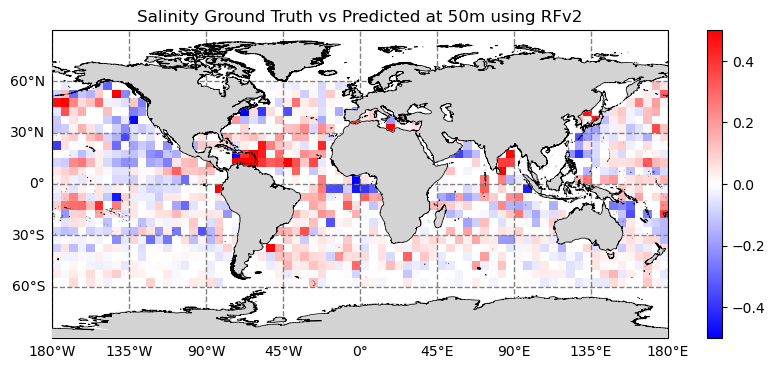

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.stats import binned_statistic_2d
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

bin_means_p1, xedges, yedges, _ = binned_statistic_2d(p1['LONGITUDE'], p1['LATITUDE'], profiles['ASAL_height47.21189498901367'] - p1['ASAL_height47.21189498901367'], statistic='mean', bins=[np.arange(-180, 181, 5), np.arange(-90, 91, 5)])
bin_means_p2, xedges, yedges, _ = binned_statistic_2d(p2['LONGITUDE'], p2['LATITUDE'], profiles['ASAL_height47.21189498901367'] - p2['ASAL_height47.21189498901367'], statistic='mean', bins=[np.arange(-180, 181, 5), np.arange(-90, 91, 5)])

plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m', color='black', linewidth=0.5, zorder=4)
ax.add_feature(cfeature.LAND, color='lightgray', edgecolor='black', zorder=3)
plt.imshow(bin_means_p2.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='bwr', vmin=-0.5, vmax=0.5)
plt.colorbar()
plt.title('Salinity Ground Truth vs Predicted at 50m using RFv1')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', linewidth=1, color='gray')
gl.xlocator = plt.FixedLocator(np.arange(-180, 181, 45))
gl.ylocator = plt.FixedLocator(np.arange(-90, 91, 30))
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
plt.savefig('../models_validation/profs_rfv1_asal_50m.png')
plt.show()

plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m', color='black', linewidth=0.5, zorder=4)
ax.add_feature(cfeature.LAND, color='lightgray', edgecolor='black', zorder=3)
plt.imshow(bin_means_p1.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='bwr', vmin=-0.5, vmax=0.5)
plt.colorbar()
plt.title('Salinity Ground Truth vs Predicted at 50m using RFv2')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', linewidth=1, color='gray')
gl.xlocator = plt.FixedLocator(np.arange(-180, 181, 45))
gl.ylocator = plt.FixedLocator(np.arange(-90, 91, 30))
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
plt.savefig('../models_validation/profs_rfv2_asal_50m.png')
plt.show()

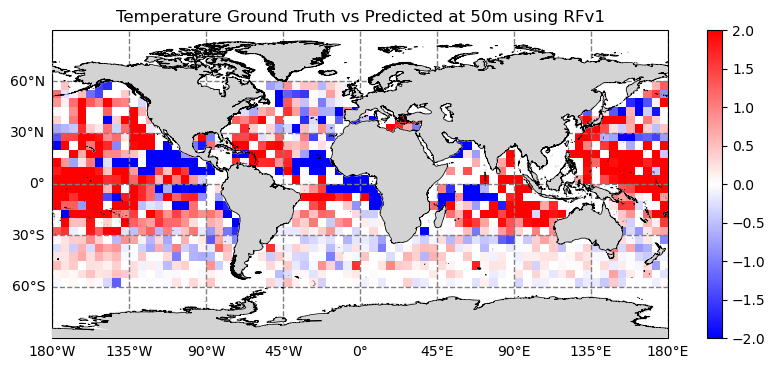

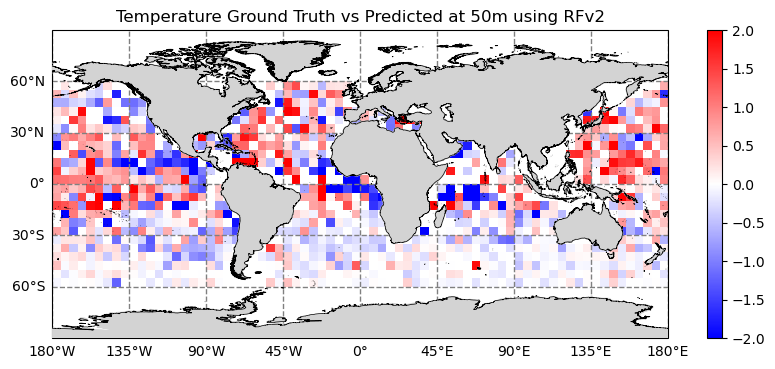

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.stats import binned_statistic_2d
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

bin_means_p1, xedges, yedges, _ = binned_statistic_2d(p1['LONGITUDE'], p1['LATITUDE'], profiles['CTEMP_height47.21189498901367'] - p1['CTEMP_height47.21189498901367'], statistic='mean', bins=[np.arange(-180, 181, 5), np.arange(-90, 91, 5)])
bin_means_p2, xedges, yedges, _ = binned_statistic_2d(p2['LONGITUDE'], p2['LATITUDE'], profiles['CTEMP_height47.21189498901367'] - p2['CTEMP_height47.21189498901367'], statistic='mean', bins=[np.arange(-180, 181, 5), np.arange(-90, 91, 5)])

plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m', color='black', linewidth=0.5, zorder=4)
ax.add_feature(cfeature.LAND, color='lightgray', edgecolor='black', zorder=3)
plt.imshow(bin_means_p2.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='bwr', vmin=-2, vmax=2)
plt.colorbar()
plt.title('Temperature Ground Truth vs Predicted at 50m using RFv1')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', linewidth=1, color='gray')
gl.xlocator = plt.FixedLocator(np.arange(-180, 181, 45))
gl.ylocator = plt.FixedLocator(np.arange(-90, 91, 30))
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
plt.savefig('../models_validation/profs_rfv1_ctemp_50m.png')
plt.show()

plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m', color='black', linewidth=0.5, zorder=4)
ax.add_feature(cfeature.LAND, color='lightgray', edgecolor='black', zorder=3)
plt.imshow(bin_means_p1.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='bwr', vmin=-2, vmax=2)
plt.colorbar()
plt.title('Temperature Ground Truth vs Predicted at 50m using RFv2')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', linewidth=1, color='gray')
gl.xlocator = plt.FixedLocator(np.arange(-180, 181, 45))
gl.ylocator = plt.FixedLocator(np.arange(-90, 91, 30))
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
plt.savefig('../models_validation/profs_rfv2_ctemp_50m.png')
plt.show()

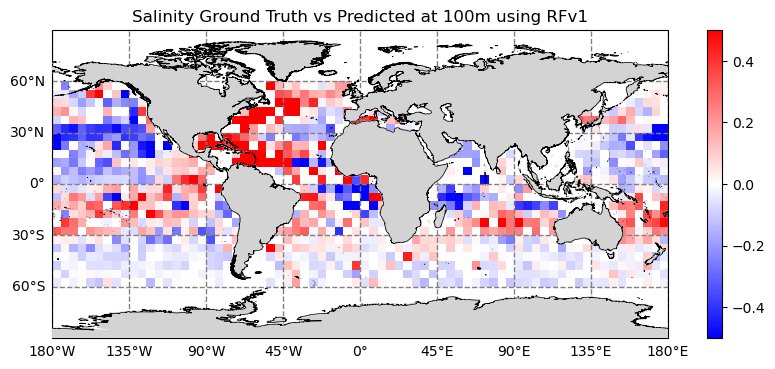

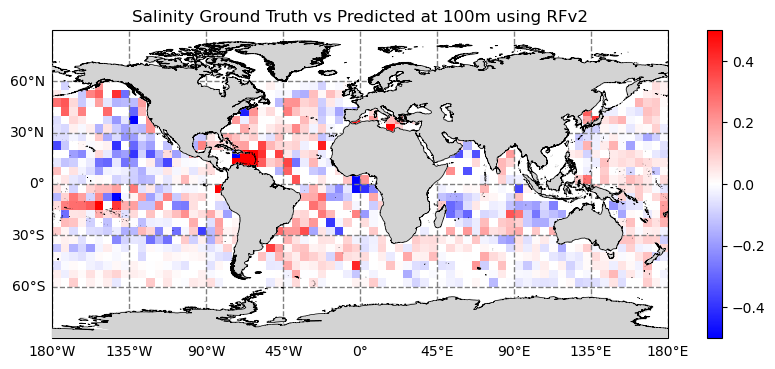

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.stats import binned_statistic_2d
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

bin_means_p1, xedges, yedges, _ = binned_statistic_2d(p1['LONGITUDE'], p1['LATITUDE'], profiles['ASAL_height97.04131317138672'] - p1['ASAL_height97.04131317138672'], statistic='mean', bins=[np.arange(-180, 181, 5), np.arange(-90, 91, 5)])
bin_means_p2, xedges, yedges, _ = binned_statistic_2d(p2['LONGITUDE'], p2['LATITUDE'], profiles['ASAL_height97.04131317138672'] - p2['ASAL_height97.04131317138672'], statistic='mean', bins=[np.arange(-180, 181, 5), np.arange(-90, 91, 5)])

plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m', color='black', linewidth=0.5, zorder=4)
ax.add_feature(cfeature.LAND, color='lightgray', edgecolor='black', zorder=3)
plt.imshow(bin_means_p2.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='bwr', vmin=-0.5, vmax=0.5)
plt.colorbar()
plt.title('Salinity Ground Truth vs Predicted at 100m using RFv1')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', linewidth=1, color='gray')
gl.xlocator = plt.FixedLocator(np.arange(-180, 181, 45))
gl.ylocator = plt.FixedLocator(np.arange(-90, 91, 30))
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
plt.savefig('../models_validation/profs_rfv1_asal_100m.png')
plt.show()

plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m', color='black', linewidth=0.5, zorder=4)
ax.add_feature(cfeature.LAND, color='lightgray', edgecolor='black', zorder=3)
plt.imshow(bin_means_p1.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='bwr', vmin=-0.5, vmax=0.5)
plt.colorbar()
plt.title('Salinity Ground Truth vs Predicted at 100m using RFv2')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', linewidth=1, color='gray')
gl.xlocator = plt.FixedLocator(np.arange(-180, 181, 45))
gl.ylocator = plt.FixedLocator(np.arange(-90, 91, 30))
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
plt.savefig('../models_validation/profs_rfv2_asal_100m.png')
plt.show()

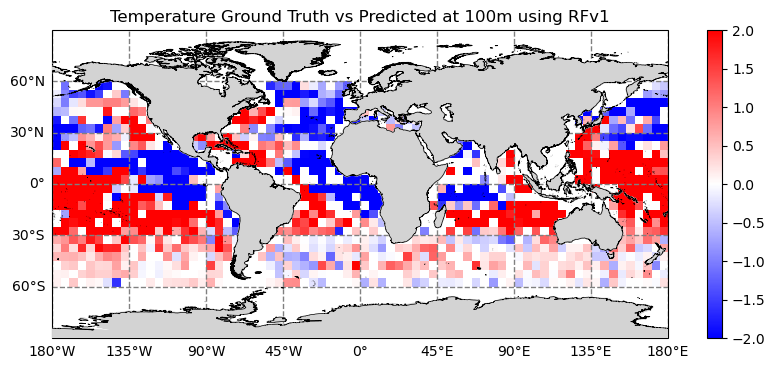

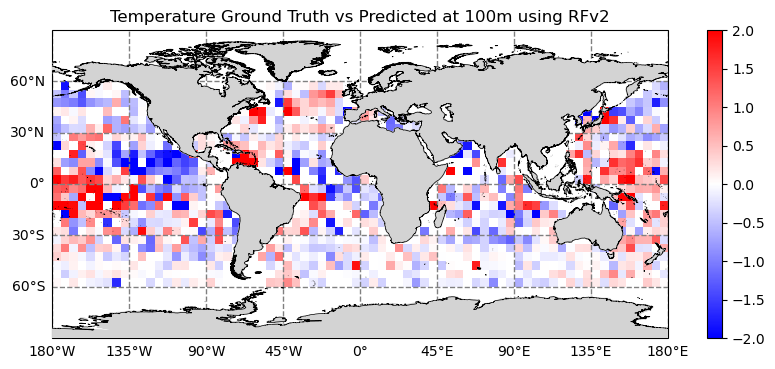

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.stats import binned_statistic_2d
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

bin_means_p1, xedges, yedges, _ = binned_statistic_2d(p1['LONGITUDE'], p1['LATITUDE'], profiles['CTEMP_height97.04131317138672'] - p1['CTEMP_height97.04131317138672'], statistic='mean', bins=[np.arange(-180, 181, 5), np.arange(-90, 91, 5)])
bin_means_p2, xedges, yedges, _ = binned_statistic_2d(p2['LONGITUDE'], p2['LATITUDE'], profiles['CTEMP_height97.04131317138672'] - p2['CTEMP_height97.04131317138672'], statistic='mean', bins=[np.arange(-180, 181, 5), np.arange(-90, 91, 5)])

plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m', color='black', linewidth=0.5, zorder=4)
ax.add_feature(cfeature.LAND, color='lightgray', edgecolor='black', zorder=3)
plt.imshow(bin_means_p2.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='bwr', vmin=-2, vmax=2)
plt.colorbar()
plt.title('Temperature Ground Truth vs Predicted at 100m using RFv1')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', linewidth=1, color='gray')
gl.xlocator = plt.FixedLocator(np.arange(-180, 181, 45))
gl.ylocator = plt.FixedLocator(np.arange(-90, 91, 30))
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
plt.savefig('../models_validation/profs_rfv1_ctemp_100m.png')
plt.show()

plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m', color='black', linewidth=0.5, zorder=4)
ax.add_feature(cfeature.LAND, color='lightgray', edgecolor='black', zorder=3)
plt.imshow(bin_means_p1.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='bwr', vmin=-2, vmax=2)
plt.colorbar()
plt.title('Temperature Ground Truth vs Predicted at 100m using RFv2')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', linewidth=1, color='gray')
gl.xlocator = plt.FixedLocator(np.arange(-180, 181, 45))
gl.ylocator = plt.FixedLocator(np.arange(-90, 91, 30))
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
plt.savefig('../models_validation/profs_rfv2_ctemp_100m.png')

plt.show()

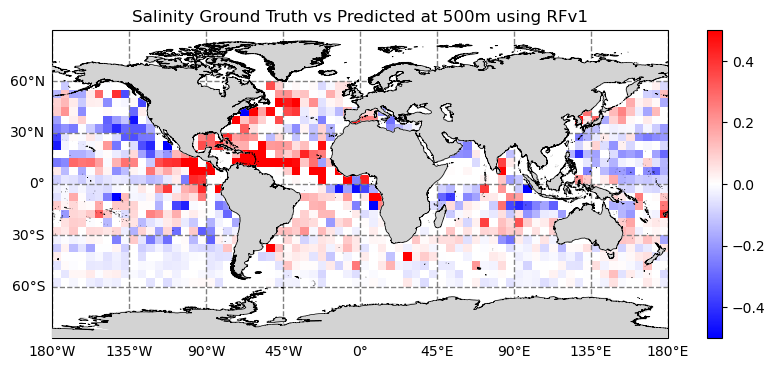

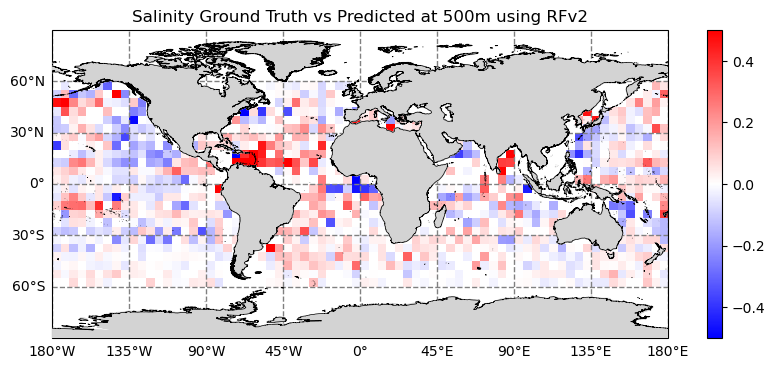

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.stats import binned_statistic_2d
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

bin_means_p1, xedges, yedges, _ = binned_statistic_2d(p1['LONGITUDE'], p1['LATITUDE'], profiles['ASAL_height47.21189498901367'] - p1['ASAL_height47.21189498901367'], statistic='mean', bins=[np.arange(-180, 181, 5), np.arange(-90, 91, 5)])
bin_means_p2, xedges, yedges, _ = binned_statistic_2d(p2['LONGITUDE'], p2['LATITUDE'], profiles['ASAL_height47.21189498901367'] - p2['ASAL_height47.21189498901367'], statistic='mean', bins=[np.arange(-180, 181, 5), np.arange(-90, 91, 5)])

plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m', color='black', linewidth=0.5, zorder=4)
ax.add_feature(cfeature.LAND, color='lightgray', edgecolor='black', zorder=3)
plt.imshow(bin_means_p2.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='bwr', vmin=-0.5, vmax=0.5)
plt.colorbar()
plt.title('Salinity Ground Truth vs Predicted at 500m using RFv1')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', linewidth=1, color='gray')
gl.xlocator = plt.FixedLocator(np.arange(-180, 181, 45))
gl.ylocator = plt.FixedLocator(np.arange(-90, 91, 30))
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
plt.savefig('../models_validation/profs_rfv1_asal_500m.png')
plt.show()

plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m', color='black', linewidth=0.5, zorder=4)
ax.add_feature(cfeature.LAND, color='lightgray', edgecolor='black', zorder=3)
plt.imshow(bin_means_p1.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='bwr', vmin=-0.5, vmax=0.5)
plt.colorbar()
plt.title('Salinity Ground Truth vs Predicted at 500m using RFv2')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', linewidth=1, color='gray')
gl.xlocator = plt.FixedLocator(np.arange(-180, 181, 45))
gl.ylocator = plt.FixedLocator(np.arange(-90, 91, 30))
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
plt.savefig('../models_validation/profs_rfv2_asal_500m.png')

plt.show()

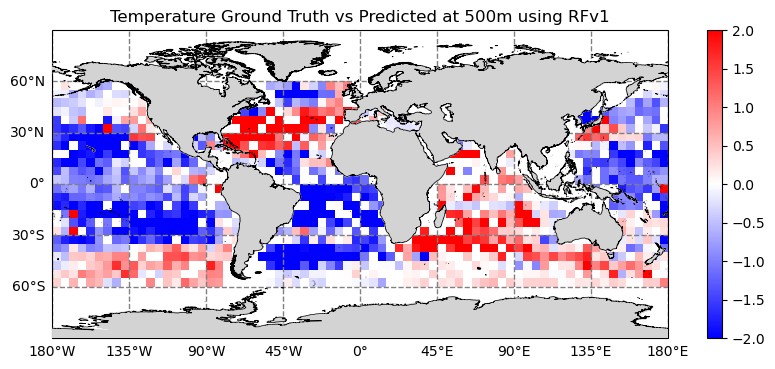

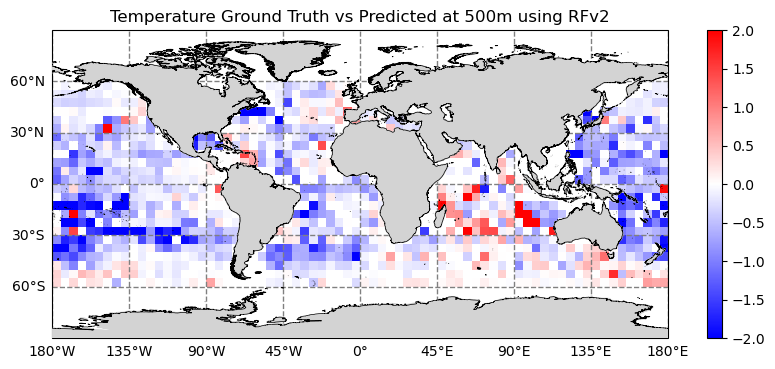

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.stats import binned_statistic_2d
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

bin_means_p1, xedges, yedges, _ = binned_statistic_2d(p1['LONGITUDE'], p1['LATITUDE'], profiles['CTEMP_height508.639892578125'] - p1['CTEMP_height508.639892578125'], statistic='mean', bins=[np.arange(-180, 181, 5), np.arange(-90, 91, 5)])
bin_means_p2, xedges, yedges, _ = binned_statistic_2d(p2['LONGITUDE'], p2['LATITUDE'], profiles['CTEMP_height508.639892578125'] - p2['CTEMP_height508.639892578125'], statistic='mean', bins=[np.arange(-180, 181, 5), np.arange(-90, 91, 5)])

plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m', color='black', linewidth=0.5, zorder=4)
ax.add_feature(cfeature.LAND, color='lightgray', edgecolor='black', zorder=3)
plt.imshow(bin_means_p2.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='bwr', vmin=-2, vmax=2)
plt.colorbar()
plt.title('Temperature Ground Truth vs Predicted at 500m using RFv1')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', linewidth=1, color='gray')
gl.xlocator = plt.FixedLocator(np.arange(-180, 181, 45))
gl.ylocator = plt.FixedLocator(np.arange(-90, 91, 30))
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
plt.savefig('../models_validation/profs_rfv1_ctemp_500m.png')
plt.show()

plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='10m', color='black', linewidth=0.5, zorder=4)
ax.add_feature(cfeature.LAND, color='lightgray', edgecolor='black', zorder=3)
plt.imshow(bin_means_p1.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='bwr', vmin=-2, vmax=2)
plt.colorbar()
plt.title('Temperature Ground Truth vs Predicted at 500m using RFv2')
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linestyle='--', linewidth=1, color='gray')
gl.xlocator = plt.FixedLocator(np.arange(-180, 181, 45))
gl.ylocator = plt.FixedLocator(np.arange(-90, 91, 30))
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
plt.savefig('../models_validation/profs_rfv2_ctemp_500m.png')
plt.show()